# Steel plates faults
 Нам предлагается задача классфикации дефекта нержавеющей металлической пластины по их описаниям.

Предлагается 27 индикаторов, примерно описывающие геометрическую форму дефекта и его контур. У данного набора данных нет подробного описания в открытом доступе, о смысле большей части признаков/дефектов приходится только догадываться.

1. X_Minimum
2. X_Maximum
3. Y_Minimum
4. Y_Maximum
5. Pixels_Areas
6. X_Perimeter
7. Y_Perimeter
8. Sum_of_Luminosity
9. Minimum_of_Luminosity
10. Maximum_of_Luminosity
11. Length_of_Conveyer - длина конвеера
12. TypeOfSteel_A300 - бинарный признак принадлежности стали к A300
13. TypeOfSteel_A400 - бинарный признак принадлежности стали к A400
14. Steel_Plate_Thickness - толщина пластины
15. Edges_Index
16. Empty_Index
17. Square_Index
18. Outside_X_Index
19. Edges_X_Index
20. Edges_Y_Index
21. Outside_Global_Index
22. LogOfAreas
23. Log_X_Index
24. Log_Y_Index
25. Orientation_Index
26. Luminosity_Index
27. SigmoidOfAreas

Задача - классифицировать дефекты. Каждая запись в таблице относится к одной из 7 групп дефектов. Конец каждого ряда содержит в таблице данных 7 групп возможных дефектов, если для одного из них стоит 1, то для остальных - 0.

1. Pastry - ?
2. Z_Scratch - царапина Z (?)
3. K_Scatch - царапина K (?)
4. Stains - Пятна
5. Dirtiness - Грязь
6. Bumps - Неровности по толщине (бугры).
7. Other_Faults - Другие дефекты

### Подключение модулей<br>
Подключение модулей<br>
numpy – матричные операции<br>
matplotlib – научная графика<br>
pandas – таблицы (DataFrame) для анализа данных<br>
scikit-learn – алгоритмы машинного обучения<br>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

pd.set_option("display.max_columns",999)
pd.set_option("display.max_rows",60)

Cчитывание файла с данными

In [130]:
data = pd.read_csv('steel_plates_faults.csv', sep = ';', engine = 'python')

Тип data:

In [3]:
type(data)

pandas.core.frame.DataFrame

Разные способы вывода данных:

In [23]:

data

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
5,430,441,100250,100337,630,20,87,62357,64,127,1387,0,1,40,0.6200,0.3417,0.1264,0.0079,0.5500,1.0000,1.0,2.7993,1.0414,1.9395,0.8736,-0.2267,0.9874,1,0,0,0,0,0,0
6,413,446,138468,138883,9052,230,432,1481991,23,199,1687,0,1,150,0.4896,0.3390,0.0795,0.0196,0.1435,0.9607,1.0,3.9567,1.5185,2.6181,0.9205,0.2791,1.0000,1,0,0,0,0,0,0
7,190,200,210936,210956,132,11,20,20007,124,172,1687,0,1,150,0.2253,0.3400,0.5000,0.0059,0.9091,1.0000,1.0,2.1206,1.0000,1.3010,0.5000,0.1841,0.3359,1,0,0,0,0,0,0
8,330,343,429227,429253,264,15,26,29748,53,148,1687,0,1,150,0.3912,0.2189,0.5000,0.0077,0.8667,1.0000,1.0,2.4216,1.1139,1.4150,0.5000,-0.1197,0.5593,1,0,0,0,0,0,0
9,74,90,779144,779308,1506,46,167,180215,53,143,1687,0,1,150,0.0877,0.4261,0.0976,0.0095,0.3478,0.9820,1.0,3.1778,1.2041,2.2148,0.9024,-0.0651,1.0000,1,0,0,0,0,0,0


In [25]:
print(data)

      X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0            42         50     270900     270944           267           17   
1           645        651    2538079    2538108           108           10   
2           829        835    1553913    1553931            71            8   
3           853        860     369370     369415           176           13   
4          1289       1306     498078     498335          2409           60   
5           430        441     100250     100337           630           20   
6           413        446     138468     138883          9052          230   
7           190        200     210936     210956           132           11   
8           330        343     429227     429253           264           15   
9            74         90     779144     779308          1506           46   
10          106        118     813452     813500           442           13   
11          505        515     106604     106668    

Первые 5 пластин:

In [26]:
data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


Последние 5 пластин:

In [27]:
data.tail()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
1936,249,277,325780,325796,273,54,22,35033,119,141,1360,0,1,40,0.3662,0.3906,0.5714,0.0206,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,1360,0,1,40,0.2118,0.4554,0.5484,0.0228,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,1360,0,1,40,0.2132,0.3287,0.5172,0.0213,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,1360,0,1,40,0.2015,0.5904,0.9394,0.0243,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1
1940,1261,1281,87951,87967,103,26,22,11682,101,133,1360,1,0,80,0.1162,0.6781,0.8000,0.0147,0.7692,0.7273,0.0,2.0128,1.3010,1.2041,-0.2000,-0.1139,0.5296,0,0,0,0,0,0,1


Размер таблицы:

In [5]:
print(data.shape)

(1941, 34)


В таблице 1941 строк и 34 столбца.

Посмотрим на типы данных.

In [7]:
type(data['Steel_Plate_Thickness'])

pandas.core.series.Series

Выведем названия столбцов

In [8]:
print(data.columns)

Index([u'X_Minimum', u'X_Maximum', u'Y_Minimum', u'Y_Maximum', u'Pixels_Areas',
       u'X_Perimeter', u'Y_Perimeter', u'Sum_of_Luminosity',
       u'Minimum_of_Luminosity', u'Maximum_of_Luminosity',
       u'Length_of_Conveyer', u'TypeOfSteel_A300', u'TypeOfSteel_A400',
       u'Steel_Plate_Thickness', u'Edges_Index', u'Empty_Index',
       u'Square_Index', u'Outside_X_Index', u'Edges_X_Index', u'Edges_Y_Index',
       u'Outside_Global_Index', u'LogOfAreas', u'Log_X_Index', u'Log_Y_Index',
       u'Orientation_Index', u'Luminosity_Index', u'SigmoidOfAreas', u'Pastry',
       u'Z_Scratch', u'K_Scatch', u'Stains', u'Dirtiness', u'Bumps',
       u'Other_Faults'],
      dtype='object')


Посмотрим общую информацию по текущему набору данных

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
X_Minimum                1941 non-null int64
X_Maximum                1941 non-null int64
Y_Minimum                1941 non-null int64
Y_Maximum                1941 non-null int64
Pixels_Areas             1941 non-null int64
X_Perimeter              1941 non-null int64
Y_Perimeter              1941 non-null int64
Sum_of_Luminosity        1941 non-null int64
Minimum_of_Luminosity    1941 non-null int64
Maximum_of_Luminosity    1941 non-null int64
Length_of_Conveyer       1941 non-null int64
TypeOfSteel_A300         1941 non-null int64
TypeOfSteel_A400         1941 non-null int64
Steel_Plate_Thickness    1941 non-null int64
Edges_Index              1941 non-null float64
Empty_Index              1941 non-null float64
Square_Index             1941 non-null float64
Outside_X_Index          1941 non-null float64
Edges_X_Index            1941 non-null float64
Edges_Y_Index            194

Посмотрим основные статистические характеристики данных<br>
<br>
Так как чистых категориальных признаков нет, то всё сразу включено в таблицу:

In [79]:
data.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,TypeOfSteel_A300,TypeOfSteel_A400
count,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1941.000000,1941.000000
mean,5.319461e-16,8.431060e-17,-5.193624e-17,-1.544360e-17,-4.452904e-17,3.769096e-16,-1.451126e-16,-4.544421e-17,4.269297e-16,-4.893332e-16,1.162274e-16,2.196423e-15,-2.228568e-15,-1.642630e-15,1.673342e-15,6.023232e-15,8.865197e-16,1.143112e-15,2.190016e-15,-1.634876e-15,1.125438e-15,-1.194597e-14,7.411053e-15,8.714993e-15,-3.803129e-16,2.254479e-16,-6.445128e-16,0.400309,0.599691
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.490087,0.490087
min,-1.096882e+00,-1.233783e+00,-9.264019e-01,-9.264194e-01,-3.660430e-01,-3.647141e-01,-1.921906e-01,-4.022345e-01,-2.631106e+00,-4.986023e+00,-1.605780e+00,-8.168120e-01,-1.223641e+00,-7.032230e-01,-1.106781e+00,-3.017622e+00,-2.075077e+00,-5.403743e-01,-2.450412e+00,-3.265721e+00,-1.193598e+00,-2.777672e+00,-2.148383e+00,-3.088558e+00,-2.144852e+00,-5.831911e+00,-1.374040e+00,0.000000,0.000000
25%,-9.989348e-01,-8.559907e-01,-6.646265e-01,-6.646367e-01,-3.501775e-01,-3.215547e-01,-1.640535e-01,-3.841355e-01,-6.705826e-01,-3.313743e-01,-6.996939e-01,-8.168120e-01,-1.223641e+00,-7.032230e-01,-9.052538e-01,-7.169043e-01,-7.727750e-01,-4.538767e-01,-8.168824e-01,-9.248682e-01,-1.193598e+00,-7.200746e-01,-6.970059e-01,-7.132712e-01,-8.317313e-01,-4.281529e-01,-9.934266e-01,0.000000,0.000000
50%,-2.614528e-01,-3.033684e-01,-2.516411e-01,-2.516653e-01,-3.327642e-01,-2.850352e-01,-1.359164e-01,-3.652401e-01,1.696417e-01,-1.708692e-01,-6.581938e-01,-8.168120e-01,8.168120e-01,-1.586203e-01,-3.483854e-01,-1.532366e-02,-5.595522e-02,-3.945156e-01,1.063453e-01,5.716724e-01,8.795773e-01,-3.191518e-01,-3.313586e-01,-1.784355e-01,2.378344e-02,-1.139334e-02,-2.330830e-01,0.000000,1.000000
75%,9.254323e-01,9.124006e-01,3.000082e-01,2.999821e-01,-2.073884e-01,-9.247802e-02,7.972909e-05,-2.406845e-01,6.675524e-01,5.246530e-01,1.319980e+00,1.223641e+00,8.168120e-01,2.291390e-02,8.077254e-01,6.367165e-01,9.128398e-01,-1.672474e-01,7.788300e-01,7.961962e-01,8.795773e-01,5.355503e-01,3.795877e-01,7.244023e-01,8.551401e-01,4.349427e-01,1.220732e+00,1.000000,1.000000
max,2.177615e+00,2.200513e+00,6.388546e+00,6.388491e+00,2.916945e+01,3.431882e+01,4.236755e+01,2.222378e+01,3.686136e+00,6.570346e+00,2.315983e+00,1.223641e+00,8.168120e-01,4.016667e+00,2.213743e+00,3.859033e+00,1.583544e+00,1.428973e+01,1.600938e+00,7.961962e-01,8.795773e-01,3.411345e+00,3.609576e+00,6.284712e+00,1.813676e+00,5.198773e+00,1.221321e+00,1.000000,1.000000


In [29]:
data.corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,0.316662,0.144319,-0.144319,0.136625,0.278075,-0.198461,0.063658,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251,0.134956,-0.228960,-0.419264,0.073740,0.103924,0.221296,0.164804
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,0.299390,0.112009,-0.112009,0.106119,0.242846,-0.152680,0.048575,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736,0.119814,-0.258178,-0.336084,0.061471,0.096523,0.201704,0.145783
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,-0.049211,0.075164,-0.075164,-0.207640,0.021314,-0.043117,-0.006135,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257,0.036488,-0.063327,-0.000420,-0.066601,0.064262,0.126121,-0.084415
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,-0.049219,0.075151,-0.075151,-0.207644,0.021300,-0.043085,-0.006152,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284,0.036488,-0.063329,-0.000397,-0.066606,0.064262,0.126110,-0.084422
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,-0.155853,-0.235591,0.235591,-0.183735,-0.275289,0.272808,0.017865,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947,-0.076752,-0.088440,0.556846,-0.071182,-0.050578,-0.163739,-0.184632
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,-0.134240,-0.189250,0.189250,-0.147712,-0.227590,0.306348,0.004507,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605,-0.075418,-0.060582,0.455003,-0.067547,-0.037820,-0.140197,-0.142903
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,-0.063825,-0.095154,0.095154,-0.058889,-0.111240,0.188825,-0.047511,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772,-0.017616,-0.025721,0.203063,-0.035743,-0.010058,-0.070989,-0.066801
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,-0.169331,-0.263632,0.263632,-0.204812,-0.301452,0.293691,0.049607,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248,-0.084307,-0.099592,0.616950,-0.078111,-0.055272,-0.179831,-0.205890
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,-0.023579,0.042048,-0.042048,0.103393,0.358915,-0.044111,0.066748,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797,-0.074697,0.049905,-0.461000,0.183327,0.092765,0.078690,0.228112
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,-0.098009,-0.216339,0.216339,-0.128397,0.149675,0.031425,0.065517,0.099300,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651,-0.058742,-0.189441,0.185897,0.090456,0.022157,-0.047549,-0.007784


Посмотрим корреляцию отдельно для каждого из типов металлов.

In [31]:
data[data["TypeOfSteel_A300"] == 1].corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
X_Minimum,1.000000,0.993667,0.075038,0.075034,-0.093378,-0.118339,-0.151666,-0.089115,-0.068996,-0.063008,0.391922,NaN,NaN,0.091561,0.220827,-0.128374,0.143026,-0.067738,0.202670,0.017421,-0.068684,-0.179927,-0.089800,-0.202624,-0.129190,-0.067433,-0.191434,0.059915,-0.506044,0.063767,0.022727,0.091836,0.236708,0.145513
X_Maximum,0.993667,1.000000,0.094378,0.094374,-0.010369,-0.026854,-0.107241,-0.003522,-0.075611,-0.039481,0.381010,NaN,NaN,0.094702,0.221614,-0.110582,0.116942,0.044596,0.210639,-0.038049,-0.087699,-0.127315,-0.013501,-0.189186,-0.159884,-0.062791,-0.157051,0.052936,-0.510816,0.063834,0.022858,0.091535,0.227808,0.162315
Y_Minimum,0.075038,0.094378,1.000000,1.000000,0.104751,0.106350,0.014960,0.103111,0.056738,0.092295,-0.049806,NaN,NaN,-0.022268,-0.001128,0.073008,-0.083961,0.174514,0.074579,-0.208513,-0.139191,0.059654,0.192237,-0.057008,-0.187665,0.078530,0.050014,0.020098,-0.174101,-0.028108,-0.040994,0.266420,0.089492,-0.003300
Y_Maximum,0.075034,0.094374,1.000000,1.000000,0.104769,0.106366,0.014986,0.103127,0.056729,0.092292,-0.049809,NaN,NaN,-0.022269,-0.001132,0.073016,-0.083972,0.174518,0.074561,-0.208514,-0.139183,0.059675,0.192246,-0.056985,-0.187653,0.078524,0.050031,0.020101,-0.174096,-0.028108,-0.040995,0.266420,0.089487,-0.003301
Pixels_Areas,-0.093378,-0.010369,0.104751,0.104769,1.000000,0.917725,0.804415,0.992506,-0.199690,0.114566,-0.113113,NaN,NaN,0.038108,-0.036320,0.206019,-0.242192,0.739555,-0.223551,-0.317403,0.027472,0.670913,0.602547,0.465135,0.025169,-0.066467,0.425759,-0.024992,0.037750,0.006922,-0.009427,-0.008649,-0.114636,0.097813
X_Perimeter,-0.118339,-0.026854,0.106350,0.106366,0.917725,1.000000,0.809511,0.930958,-0.121175,0.156469,-0.148197,NaN,NaN,0.013134,-0.055622,0.306513,-0.278095,0.809502,-0.245020,-0.465008,-0.034419,0.690838,0.709276,0.440341,-0.056747,-0.005869,0.485483,-0.045557,0.074956,-0.003661,-0.004465,-0.005650,-0.116035,0.076958
Y_Perimeter,-0.151666,-0.107241,0.014960,0.014986,0.804415,0.809511,1.000000,0.786628,-0.234889,0.023595,-0.128648,NaN,NaN,-0.009640,-0.118375,0.328975,-0.352065,0.391012,-0.514564,-0.247206,0.157631,0.783470,0.513052,0.726951,0.260928,-0.127954,0.595845,0.023182,0.130851,0.001064,-0.015291,-0.011967,-0.143999,0.022996
Sum_of_Luminosity,-0.089115,-0.003522,0.103111,0.103127,0.992506,0.930958,0.786628,1.000000,-0.147104,0.164785,-0.109280,NaN,NaN,0.035968,-0.024453,0.209213,-0.230205,0.761663,-0.202179,-0.337796,0.011617,0.654998,0.612518,0.437822,-0.001552,-0.010077,0.412373,-0.027811,0.034284,0.002195,-0.008929,-0.008325,-0.105792,0.093594
Minimum_of_Luminosity,-0.068996,-0.075611,0.056738,0.056729,-0.199690,-0.121175,-0.234889,-0.147104,1.000000,0.567890,-0.053246,NaN,NaN,-0.150520,0.152978,0.160699,0.044469,-0.057404,0.141022,-0.206380,-0.267262,-0.329067,-0.050701,-0.343674,-0.298945,0.877882,-0.234315,-0.016192,0.028663,-0.053645,0.046308,0.105040,-0.000669,-0.039240
Maximum_of_Luminosity,-0.063008,-0.039481,0.092295,0.092292,0.114566,0.156469,0.023595,0.164785,0.567890,1.000000,0.115853,NaN,NaN,-0.107658,0.217455,0.013452,-0.067604,0.193926,0.200226,-0.325097,-0.298458,0.030536,0.305979,-0.193114,-0.382748,0.830339,0.010197,-0.015654,-0.200538,-0.061065,0.012791,0.102023,0.109174,0.053745


In [32]:
data[data["TypeOfSteel_A400"] == 1].corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
X_Minimum,1.000000,0.985784,0.008948,0.008930,-0.368852,-0.302235,-0.130726,-0.411283,0.371648,-0.032853,0.185560,NaN,NaN,0.138887,0.298911,-0.230672,-0.031855,-0.483043,0.090899,0.530763,0.295051,-0.522092,-0.571533,-0.358396,0.367531,0.051241,-0.419821,0.196616,0.054591,-0.533910,0.128990,0.134905,0.140924,0.183531
X_Maximum,0.985784,1.000000,0.016941,0.016926,-0.285137,-0.231748,-0.102084,-0.315683,0.283735,-0.039261,0.172745,NaN,NaN,0.097300,0.243155,-0.170139,-0.035303,-0.329174,0.082445,0.430891,0.236790,-0.419147,-0.453557,-0.284971,0.295950,0.024113,-0.345092,0.176951,0.048000,-0.443925,0.108387,0.122058,0.120466,0.136957
Y_Minimum,0.008948,0.016941,1.000000,1.000000,0.032718,0.033772,0.036261,0.022570,-0.105533,-0.131142,-0.115084,NaN,NaN,-0.285605,0.020170,-0.091489,0.013340,0.041441,0.045283,0.000239,-0.029481,0.078741,0.069625,0.043111,-0.045493,-0.142227,0.051829,0.049433,-0.033321,0.039984,-0.062732,0.018276,0.136588,-0.125192
Y_Maximum,0.008930,0.016926,1.000000,1.000000,0.032922,0.034005,0.036531,0.022733,-0.105568,-0.131130,-0.115088,NaN,NaN,-0.285607,0.020152,-0.091445,0.013322,0.041464,0.045244,0.000234,-0.029470,0.078787,0.069652,0.043184,-0.045474,-0.142247,0.051856,0.049431,-0.033321,0.040007,-0.062740,0.018275,0.136578,-0.125203
Pixels_Areas,-0.368852,-0.285137,0.032718,0.032922,1.000000,0.968168,0.834936,0.977612,-0.546382,0.067166,-0.092727,NaN,NaN,-0.188415,-0.331771,0.311965,0.110156,0.585331,-0.303452,-0.480553,-0.143014,0.641675,0.593447,0.603406,-0.174517,-0.129306,0.422651,-0.110525,-0.044702,0.527329,-0.114317,-0.079672,-0.138261,-0.263817
X_Perimeter,-0.302235,-0.231748,0.033772,0.034005,0.968168,1.000000,0.922146,0.910667,-0.439117,0.072749,-0.073684,NaN,NaN,-0.149304,-0.268888,0.340266,0.092570,0.488901,-0.302512,-0.404133,-0.094096,0.541712,0.496403,0.542937,-0.118317,-0.105879,0.365295,-0.101837,-0.028264,0.430187,-0.102352,-0.060475,-0.116408,-0.205160
Y_Perimeter,-0.130726,-0.102084,0.036261,0.036531,0.834936,0.922146,1.000000,0.709581,-0.224398,0.054736,-0.033480,NaN,NaN,-0.053975,-0.123288,0.212648,-0.017527,0.202644,-0.193219,-0.125750,0.009318,0.276911,0.212465,0.354012,0.024291,-0.084628,0.175605,-0.029248,-0.010073,0.181719,-0.051733,-0.019397,-0.056122,-0.089327
Sum_of_Luminosity,-0.411283,-0.315683,0.022570,0.022733,0.977612,0.910667,0.709581,1.000000,-0.604013,0.088480,-0.098292,NaN,NaN,-0.211323,-0.367657,0.338032,0.161045,0.663410,-0.344616,-0.556792,-0.156817,0.710503,0.664052,0.650867,-0.199350,-0.107311,0.470362,-0.122653,-0.049577,0.588351,-0.127447,-0.088498,-0.153803,-0.295332
Minimum_of_Luminosity,0.371648,0.283735,-0.105533,-0.105568,-0.546382,-0.439117,-0.224398,-0.604013,1.000000,0.426811,-0.043126,NaN,NaN,0.163586,0.449529,-0.119485,0.069579,-0.607969,0.290480,0.468887,0.148840,-0.782308,-0.684795,-0.686669,0.173763,0.661493,-0.640224,-0.091831,0.085538,-0.536890,0.211365,0.094898,0.124246,0.340449
Maximum_of_Luminosity,-0.032853,-0.039261,-0.131142,-0.131130,0.067166,0.072749,0.054736,0.088480,0.426811,1.000000,-0.151848,NaN,NaN,-0.106616,0.152397,0.010736,0.228047,-0.019872,0.097801,-0.015630,0.000275,-0.111654,-0.061125,-0.126349,-0.045153,0.889732,-0.194178,-0.106999,-0.009389,0.149010,0.077598,-0.033495,-0.078095,-0.054610


Гистограмм слишком много из-за большого количества признаков, приведены не будут.
Корреляция тоже не показывает хороших результатов, но мы можем, например, посмотреть на зависимость наличия дефекта Pastry от длины конвеера.

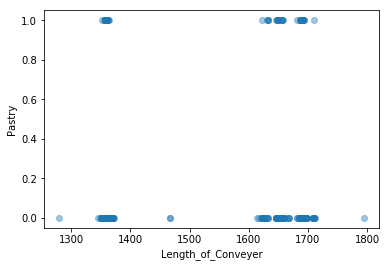

In [37]:
plt.plot(data[data["TypeOfSteel_A300"] == 1]['Length_of_Conveyer'], data[data['TypeOfSteel_A300']==1]['Pastry'], 'o', alpha = 0.4)
plt.xlabel('Length_of_Conveyer')
plt.ylabel('Pastry')
pass

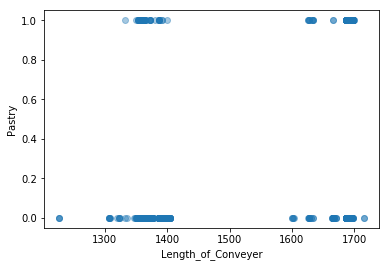

In [40]:
plt.plot(data[data["TypeOfSteel_A400"] == 1]['Length_of_Conveyer'], data[data['TypeOfSteel_A400']==1]['Pastry'], 'o', alpha = 0.4)
plt.xlabel('Length_of_Conveyer')
plt.ylabel('Pastry')
pass

Будем предсказывать дефект Pastry, поэтом уберём другие дефекты-классификации из таблицы.

In [131]:
data = data.drop(['Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], axis = 1)

In [132]:
y = np.array([1 if it == 1 else 0 for it in data['Pastry']])

In [133]:
data = data.drop('Pastry', axis=1)

## Обработка пропущенных значений

In [120]:
data.count(axis = 0)

X_Minimum                1941
X_Maximum                1941
Y_Minimum                1941
Y_Maximum                1941
Pixels_Areas             1941
X_Perimeter              1941
Y_Perimeter              1941
Sum_of_Luminosity        1941
Minimum_of_Luminosity    1941
Maximum_of_Luminosity    1941
Length_of_Conveyer       1941
TypeOfSteel_A300         1941
TypeOfSteel_A400         1941
Steel_Plate_Thickness    1941
Edges_Index              1941
Empty_Index              1941
Square_Index             1941
Outside_X_Index          1941
Edges_X_Index            1941
Edges_Y_Index            1941
Outside_Global_Index     1941
LogOfAreas               1941
Log_X_Index              1941
Log_Y_Index              1941
Orientation_Index        1941
Luminosity_Index         1941
SigmoidOfAreas           1941
TypeOfSteel_A300         1941
TypeOfSteel_A400         1941
dtype: int64

Пропущенных значений в поступивших данных нет.

## Векторизация

Все столбцы количественные, среди них есть бинарные, приведённые к 0 и 1. Разделим чистые количественные признаки и бинарные для дальнейшей нормализации первых.

In [134]:
binary_columns = [col for col in data.columns if data[col].dropna().value_counts().index.isin([0,1]).all()]
print(binary_columns)

['TypeOfSteel_A300', 'TypeOfSteel_A400']


## Нормализация количественных признаков

In [135]:
numerical_columns  = [i for i in data.columns if not data[i].value_counts().index.isin([0,1]).all()]
data_numerical = data[numerical_columns]
data_numerical.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,78.737764,0.331715,0.414203,0.570767,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,55.086032,0.299712,0.137261,0.271058,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,40.000000,0.060400,0.315800,0.361300,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,70.000000,0.227300,0.412100,0.555600,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,80.000000,0.573800,0.501600,0.818200,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000


In [136]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03
mean,5.319461e-16,8.431060e-17,-5.193624e-17,-1.544360e-17,-4.452904e-17,3.769096e-16,-1.451126e-16,-4.544421e-17,4.269297e-16,-4.893332e-16,1.162274e-16,-1.642630e-15,1.673342e-15,6.023232e-15,8.865197e-16,1.143112e-15,2.190016e-15,-1.634876e-15,1.125438e-15,-1.194597e-14,7.411053e-15,8.714993e-15,-3.803129e-16,2.254479e-16,-6.445128e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.096882e+00,-1.233783e+00,-9.264019e-01,-9.264194e-01,-3.660430e-01,-3.647141e-01,-1.921906e-01,-4.022345e-01,-2.631106e+00,-4.986023e+00,-1.605780e+00,-7.032230e-01,-1.106781e+00,-3.017622e+00,-2.075077e+00,-5.403743e-01,-2.450412e+00,-3.265721e+00,-1.193598e+00,-2.777672e+00,-2.148383e+00,-3.088558e+00,-2.144852e+00,-5.831911e+00,-1.374040e+00
25%,-9.989348e-01,-8.559907e-01,-6.646265e-01,-6.646367e-01,-3.501775e-01,-3.215547e-01,-1.640535e-01,-3.841355e-01,-6.705826e-01,-3.313743e-01,-6.996939e-01,-7.032230e-01,-9.052538e-01,-7.169043e-01,-7.727750e-01,-4.538767e-01,-8.168824e-01,-9.248682e-01,-1.193598e+00,-7.200746e-01,-6.970059e-01,-7.132712e-01,-8.317313e-01,-4.281529e-01,-9.934266e-01
50%,-2.614528e-01,-3.033684e-01,-2.516411e-01,-2.516653e-01,-3.327642e-01,-2.850352e-01,-1.359164e-01,-3.652401e-01,1.696417e-01,-1.708692e-01,-6.581938e-01,-1.586203e-01,-3.483854e-01,-1.532366e-02,-5.595522e-02,-3.945156e-01,1.063453e-01,5.716724e-01,8.795773e-01,-3.191518e-01,-3.313586e-01,-1.784355e-01,2.378344e-02,-1.139334e-02,-2.330830e-01
75%,9.254323e-01,9.124006e-01,3.000082e-01,2.999821e-01,-2.073884e-01,-9.247802e-02,7.972909e-05,-2.406845e-01,6.675524e-01,5.246530e-01,1.319980e+00,2.291390e-02,8.077254e-01,6.367165e-01,9.128398e-01,-1.672474e-01,7.788300e-01,7.961962e-01,8.795773e-01,5.355503e-01,3.795877e-01,7.244023e-01,8.551401e-01,4.349427e-01,1.220732e+00
max,2.177615e+00,2.200513e+00,6.388546e+00,6.388491e+00,2.916945e+01,3.431882e+01,4.236755e+01,2.222378e+01,3.686136e+00,6.570346e+00,2.315983e+00,4.016667e+00,2.213743e+00,3.859033e+00,1.583544e+00,1.428973e+01,1.600938e+00,7.961962e-01,8.795773e-01,3.411345e+00,3.609576e+00,6.284712e+00,1.813676e+00,5.198773e+00,1.221321e+00


## Соединяем в одну таблицу

In [137]:
data = pd.concat((data_numerical, data[binary_columns]), axis = 1)
print(data.shape)

(1941, 27)


In [138]:
data.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,TypeOfSteel_A300,TypeOfSteel_A400
count,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1941.000000,1941.000000
mean,5.319461e-16,8.431060e-17,-5.193624e-17,-1.544360e-17,-4.452904e-17,3.769096e-16,-1.451126e-16,-4.544421e-17,4.269297e-16,-4.893332e-16,1.162274e-16,-1.642630e-15,1.673342e-15,6.023232e-15,8.865197e-16,1.143112e-15,2.190016e-15,-1.634876e-15,1.125438e-15,-1.194597e-14,7.411053e-15,8.714993e-15,-3.803129e-16,2.254479e-16,-6.445128e-16,0.400309,0.599691
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.490087,0.490087
min,-1.096882e+00,-1.233783e+00,-9.264019e-01,-9.264194e-01,-3.660430e-01,-3.647141e-01,-1.921906e-01,-4.022345e-01,-2.631106e+00,-4.986023e+00,-1.605780e+00,-7.032230e-01,-1.106781e+00,-3.017622e+00,-2.075077e+00,-5.403743e-01,-2.450412e+00,-3.265721e+00,-1.193598e+00,-2.777672e+00,-2.148383e+00,-3.088558e+00,-2.144852e+00,-5.831911e+00,-1.374040e+00,0.000000,0.000000
25%,-9.989348e-01,-8.559907e-01,-6.646265e-01,-6.646367e-01,-3.501775e-01,-3.215547e-01,-1.640535e-01,-3.841355e-01,-6.705826e-01,-3.313743e-01,-6.996939e-01,-7.032230e-01,-9.052538e-01,-7.169043e-01,-7.727750e-01,-4.538767e-01,-8.168824e-01,-9.248682e-01,-1.193598e+00,-7.200746e-01,-6.970059e-01,-7.132712e-01,-8.317313e-01,-4.281529e-01,-9.934266e-01,0.000000,0.000000
50%,-2.614528e-01,-3.033684e-01,-2.516411e-01,-2.516653e-01,-3.327642e-01,-2.850352e-01,-1.359164e-01,-3.652401e-01,1.696417e-01,-1.708692e-01,-6.581938e-01,-1.586203e-01,-3.483854e-01,-1.532366e-02,-5.595522e-02,-3.945156e-01,1.063453e-01,5.716724e-01,8.795773e-01,-3.191518e-01,-3.313586e-01,-1.784355e-01,2.378344e-02,-1.139334e-02,-2.330830e-01,0.000000,1.000000
75%,9.254323e-01,9.124006e-01,3.000082e-01,2.999821e-01,-2.073884e-01,-9.247802e-02,7.972909e-05,-2.406845e-01,6.675524e-01,5.246530e-01,1.319980e+00,2.291390e-02,8.077254e-01,6.367165e-01,9.128398e-01,-1.672474e-01,7.788300e-01,7.961962e-01,8.795773e-01,5.355503e-01,3.795877e-01,7.244023e-01,8.551401e-01,4.349427e-01,1.220732e+00,1.000000,1.000000
max,2.177615e+00,2.200513e+00,6.388546e+00,6.388491e+00,2.916945e+01,3.431882e+01,4.236755e+01,2.222378e+01,3.686136e+00,6.570346e+00,2.315983e+00,4.016667e+00,2.213743e+00,3.859033e+00,1.583544e+00,1.428973e+01,1.600938e+00,7.961962e-01,8.795773e-01,3.411345e+00,3.609576e+00,6.284712e+00,1.813676e+00,5.198773e+00,1.221321e+00,1.000000,1.000000


In [139]:
X = data
feature_names = X.columns

In [140]:
type(feature_names)

pandas.core.indexes.base.Index

In [141]:
feature_names

Index([u'X_Minimum', u'X_Maximum', u'Y_Minimum', u'Y_Maximum', u'Pixels_Areas',
       u'X_Perimeter', u'Y_Perimeter', u'Sum_of_Luminosity',
       u'Minimum_of_Luminosity', u'Maximum_of_Luminosity',
       u'Length_of_Conveyer', u'Steel_Plate_Thickness', u'Edges_Index',
       u'Empty_Index', u'Square_Index', u'Outside_X_Index', u'Edges_X_Index',
       u'Edges_Y_Index', u'Outside_Global_Index', u'LogOfAreas',
       u'Log_X_Index', u'Log_Y_Index', u'Orientation_Index',
       u'Luminosity_Index', u'SigmoidOfAreas', u'TypeOfSteel_A300',
       u'TypeOfSteel_A400'],
      dtype='object')

In [142]:
print(X.shape)
print(y.shape)
N, d = X.shape

(1941, 27)
(1941L,)


In [143]:
type(y)

numpy.ndarray

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

(1358, 583)


## kNN

In [145]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

Осуществим классификацию и вычислим значение ошибки

In [146]:
knn
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

(0.047128129602356406, 0.072041166380789029)


Другой способ подсчета ошибки

In [147]:
err_test = 1 - knn.score(X_test, y_test)
err_test

0.072041166380789057

С помощью confusion_matrix построим матрицу, которая позволяет визуализировать прогнозы классификатора. Элемент матрицы (i, j) равна числу объектов, которые, принадлежат группе i, но, по прогнозам, находятся в группе j.

In [148]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[527   9]
 [ 33  14]]


## Подбор параметров

Найдем такое значение параметра k, при котором значение ошибки будет минимальным.

In [150]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

(0.064801178203240051, 3)


Осуществим классификацию при k=3 и вычислим значение ошибки еще раз

In [151]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

(0.038291605301914583, 0.072041166380789029)


Можем сказать, что при имеющихся параметрах ошибка при предсказании того, имеет ли пластина дефект Pastry, составляет 0.072

## Домашняя работа №2

На исходном наборе данных решим задачу классификации (имеет ли пластина дефект Pastry) при помощи нейронных сетей<br>
Разбиваем данные на обучающую и тестовую выборки. Тестовая выборка содержит 30% данных

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_testimport = train_test_split(X, y, test_size = 0.30, random_state = 5)
N_test, _ = X_test.shape

Обучаем MLP классификатор с 1 скрытым слоем из 2 нейронов, активационная функция - логистическая сигмоидальная

In [183]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (2), solver = 'lbfgs', activation = 'logistic', random_state = 5)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=2, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

1. hidden_layer_sizes - показывает количество нейронов на скрытом слое
2. solver (Определение из документации) - The solver for weight optimization.
    + ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
    + ‘sgd’ refers to stochastic gradient descent.
    + ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
3. activation - функция активации для скрытых слоев
    + ‘identity’ - f(x) = x
    + ‘logistic’ - f(x) = 1 / (1 + exp(-x))
    + ‘tanh’ - f(x) = tanh(x)
    + ‘relu’, - f(x) = max(0, x)
4. random_state (Определение из документации)
    + If int, random_state is the seed used by the random number generator
    + If RandomState instance, random_state is the random number generator
    + If None, the random number generator is the RandomState instance used by np.random.

Проверяем качество классификатора по величине ошибки

In [184]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Learning set error:", np.mean(y_train != y_train_pred))
print("Test set error: ", np.mean(y_test != y_test_pred))

('Learning set error:', 0.029455081001472753)
('Test set error: ', 0.15094339622641509)


Наблюдается ситуация переобучения, так как ошибка на тестовой выборке больше ошибки на обучающей выборке.<br>

Для решения проблемы переобучения увеличим число нейронов в скрытом слое:

In [191]:
mlp_model = MLPClassifier(hidden_layer_sizes = (1), solver = 'lbfgs', activation = 'logistic', random_state = 5)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=1, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

И проверим значения ошибок повторно:

In [192]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Learning set error:", np.mean(y_train != y_train_pred))
print("Test set error: ", np.mean(y_test != y_test_pred))

('Learning set error:', 0.05964653902798233)
('Test set error: ', 0.12692967409948541)


Можем видеть, что ошибки на обучающей и на тестовой выборке уменьшились.

Также, попробуем увеличить число скрытых слоев нейронной сети. Рассмотрим нейронную сеть с двумя скрытыми слоями, количество нейронов в первом слое равно 5, во втором - 7

In [193]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (5, 7), solver = 'lbfgs', activation = 'logistic', random_state = 5)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 7), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Получим следующие значения ошибок:

In [194]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Learning set error:", np.mean(y_train != y_train_pred))
print("Test set error: ", np.mean(y_test != y_test_pred))

('Learning set error:', 0.030191458026509573)
('Test set error: ', 0.15608919382504288)


Таким образом, можем заключить, что в данной задаче проблема переобучения решаема и при помощи увеличения числа нейронов на скрытом слое, и при помощи увеличения числа слоев.

### Подбор гиперпараметров ###

Подберем оптимальное значение параметра регуляризации alpha

In [195]:
alpha_arr = np.logspace(-5, 5, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (2), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 5)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Построим график зависимости ошибки от параметра alpha

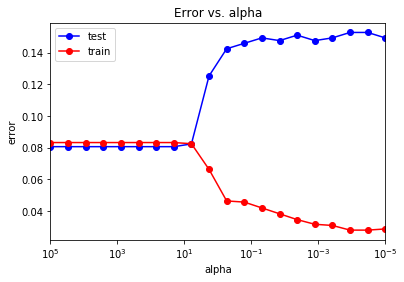

In [196]:
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [197]:
print(alpha_arr)

[  1.00000000e-05   3.35981829e-05   1.12883789e-04   3.79269019e-04
   1.27427499e-03   4.28133240e-03   1.43844989e-02   4.83293024e-02
   1.62377674e-01   5.45559478e-01   1.83298071e+00   6.15848211e+00
   2.06913808e+01   6.95192796e+01   2.33572147e+02   7.84759970e+02
   2.63665090e+03   8.85866790e+03   2.97635144e+04   1.00000000e+05]


При alpha < ~20 наблюдается ситуация переобучения, так как ошибка на тестовой выборке больше, чем на обучающей. <br>

Минимальное значение ошибки

In [198]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

(0.027982326951399118, 0.080617495711835338)


Оптимальное значение alpha:

In [199]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

20.6913808111


### Классификатор при найденном оптимальном значении alpha: ###

Повторим обучение с исходными параметрами:

In [200]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (2),
                          solver = 'lbfgs', activation = 'logistic', random_state = 5)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0832106038292
0.0806174957118


Построим матрицу рассогласования. Элемент матрицы (i, j) равна числу объектов, которые, принадлежат группе i, но, по прогнозам, находятся в группе j.

In [201]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[536  47]
 [  0   0]]


### Поиск оптимального количества нейронов ###

Проанализируем оптимальное количество нейронов для MLP классификатора с одним скрытым слоев.

In [202]:
neurons_arr = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
test_err = []
train_err = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 5)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Построим график зависимости ошибки от количества нейронов

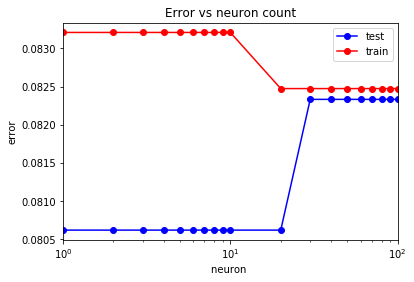

In [203]:
plt.semilogx(neurons_arr, test_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs neuron count')
plt.xlabel('neuron ')
plt.ylabel('error')
plt.legend()
pass

In [205]:
print(neurons_arr)

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100)


Анализируя график, можно сделать выводы, что при одном скрытом слое использование количества нейронов больше 20 оптимально с ошибкой 0.08, использование меньшего ведёт к ситуации переобучения.

In [204]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

(0.08247422680412371, 0.080617495711835338)


Проанализируем оптимальное количество нейронов для MLP классификатора с двумя скрытыми слоями.

In [208]:
neurons_arr = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
test_err = []
train_err = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron, 7), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 5)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Построим график зависимости ошибки от количества нейронов

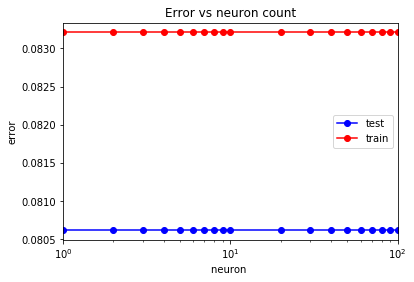

In [209]:
plt.semilogx(neurons_arr, test_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs neuron count')
plt.xlabel('neuron ')
plt.ylabel('error')
plt.legend()
pass

# Домашнаяя работа №3  #


Разбиваем данные на обучающую и тестовую выборки. Тестовая выборка содержит 30% данных

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

## Random forests ##

Решим задачу классификации наличия дефекта Pastry при помощи Random Forest.

Обучаем Random forest классификатор с параметром n_estimators = 10 (n_estimators = количество построенных деревьев).

In [211]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Проверим качество классификатора по величине ошибки на тестовой и обучающей выборках

In [213]:
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("Learning set error:", err_train)
print("Test set error: ", err_test)

('Learning set error:', 0.0073637702503681884)
('Test set error: ', 0.058319039451114926)


Наблюдается ситуация переобучения, т.к. ошибка на тестовой выборке оказалась выше, чем на обучающей

Построим график зависимости ошибки на тестовой и обучающей выборках и oob-ошибки от количества деревьев. Установим значение парметра oob_score = True, данный параметр определяет использовать ли out-of-bag объекты для оценки

Рассмотрим график на диапазоне от 1 до 10.

In [219]:
tree_arr = np.arange(10, 100, 5)
test_err = []
train_err = []
oob_err = []

for tree in tree_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = tree, oob_score = True)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - rf.oob_score_)

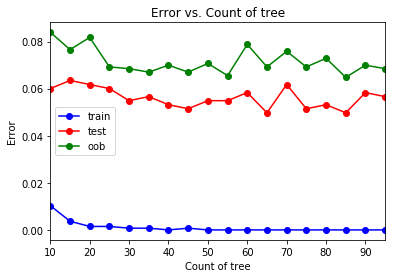

In [220]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

Наблюдается ситуация переобучения.

Минимальные значения ошибок на обучающей и тестовой выборке равны:

In [221]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Learning set error:", err_train)
print("Test set error: ", err_test)

('Learning set error:', 0.0073637702503681884)
('Test set error: ', 0.058319039451114926)



Оптимальное число деревьев при этом равно:

In [222]:
trees_opt = tree_arr[test_err == min_test_err]
print(trees_opt)

[65 85]


## Extremely Randomized Trees ##

Решим задачу классификации наличия дефекта Pastry при помощи Extremely Randomized Trees.<br>

Обучаем Extremely Randomized Trees классификатор с параметром n_estimators = 10 (n_estimators = количество построенных деревьев)

In [223]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 10)
ert.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Проверим качество классификатора по величине ошибки на тестовой и обучающей выборках

In [232]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Minimal learning set error:", min_train_err)
print("Minimal test set error: ", min_test_err)

('Minimal learning set error:', 0.0)
('Minimal test set error: ', 0.048027444253859346)


Ошибка на тестовой выборке превосходит ошибку на обучающей. Наблюдается ситуация переобучения.<br>

Построим график зависимости ошибки на тестовой и обучающей выборках и oob-ошибки от количества деревьев. Установим значения параметров oob_score = True (Определяет использовать ли out-of-bag объекты для оценки), bootstrap = True (Определяет применять ли бустрэп для построения дерева)<br>

Рассмотрим график на диапазоне от 1 до 10.<br>

In [225]:
tree_arr = np.arange(1, 10, 1)
test_err = []
train_err = []
oob_err = []
for tree in tree_arr:
    ert = ensemble.ExtraTreesClassifier(n_estimators = tree, oob_score=True, bootstrap=True)
    ert.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_train)))
    test_err.append(np.mean(y_test  != ert.predict(X_test)))
    oob_err.append(1 - ert.oob_score_)

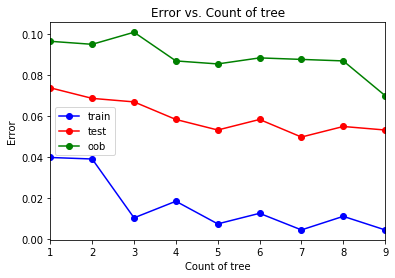

In [226]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

Рассмотрим график на диапазоне от 10 до 100.

In [227]:
tree_arr = np.arange(10, 100, 5)
test_err = []
train_err = []
oob_err = []
for tree in tree_arr:
    ert = ensemble.ExtraTreesClassifier(n_estimators = tree, oob_score=True, bootstrap=True)
    ert.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_train)))
    test_err.append(np.mean(y_test  != ert.predict(X_test)))
    oob_err.append(1 - ert.oob_score_)

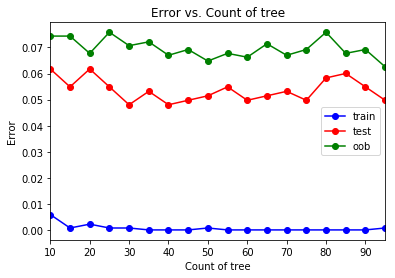

In [228]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

Минимальные значения ошибок на обучающей и тестовой выборке равны:

In [231]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Minimal learning set error:", min_train_err)
print("Minimal test set error: ", min_test_err)

('Minimal learning set error:', 0.0)
('Minimal test set error: ', 0.048027444253859346)


Оптимальное число деревьев при этом равно:

In [233]:
trees_opt = tree_arr[test_err == min_test_err]
print(trees_opt)

[30 40]


## AdaBoost ##

Решим задачу классификации дефектов по полу при помощи AdaBoost.

Обучаем AdaBoost классификатор с параметром n_estimators = 5.

In [246]:
ab = ensemble.AdaBoostClassifier(n_estimators = 5)
ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=5, random_state=None)

Проверим качество классификатора по величине ошибки на тестовой и обучающей выборках

In [247]:
err_train = np.mean(y_train != ab.predict(X_train))
err_test  = np.mean(y_test  != ab.predict(X_test))

print("Learning set error:" , err_train)
print("Test set error: ", err_test)

('Learning set error:', 0.073637702503681887)
('Test set error: ', 0.063464837049742706)


Переобучение, снова ошибка на тестовой выборке больше, чем на обучающей

Построим график зависимости ошибки на тестовой и обучающей выборках.

In [248]:
estimator_arr = np.arange(1, 50, 2)
test_err = []
train_err = []
for estimator in estimator_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators = estimator)
    ab.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ab.predict(X_train)))
    test_err.append(np.mean(y_test  != ab.predict(X_test)))

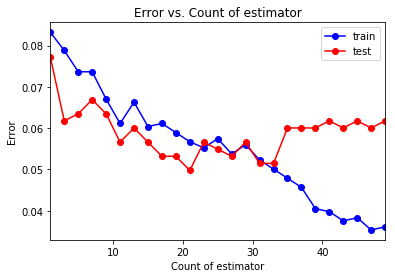

In [249]:
plt.plot(estimator_arr, train_err, 'b-o', label = 'train')
plt.plot(estimator_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(estimator_arr), np.max(estimator_arr)])
plt.title('Error vs. Count of estimator')
plt.xlabel('Count of estimator')
plt.ylabel('Error')
plt.legend()
pass

In [250]:
print(estimator_arr)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49]


При любом количестве классификаторов , кроме ∈ [27, 31) наблюдается ситуация переобучения, для количества классификаторов, принадлежащих данному интервалу, переобучение отсутствует.<br>

Минимальные значения ошибок на обучающей и тестовой выборке равны:

In [251]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Minimal learning set error:", min_train_err)
print("Minimal test set error: ", min_test_err)

('Minimal learning set error:', 0.035346097201767304)
('Minimal test set error: ', 0.04974271012006861)


Оптимальное число классификаторов при этом равно:

In [266]:
trees_opt = tree_arr[test_err == min_test_err]
print(trees_opt)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 18 but corresponding boolean dimension is 19

# Домашнаяя работа №4 #

# Principal Components Analysis #

С помощью метода главных компонент осуществим уменьшение размерности исходных данных и осуществим классификацию наличия дефекта Pastry.

Посмотрим на данные до использования PCA

In [253]:
X.shape

(1941, 27)

Исходные данные имеют 27 столбцов. Обучим PCA.

Уменьшим размерность данных до 20

In [254]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [255]:
pca_x = pca.transform(X)

Посмотрим на данные после использования PCA

In [256]:
pca_x.shape

(1941L, 20L)

Разбиваем данные после применения PCA на обучающую и тестовую выборки. Тестовая выборка содержит 30% данных

In [257]:
X_train, X_test, y_train, y_test = train_test_split(pca_x, y, test_size = 0.3, random_state = 5)

Ошибку, полученную после уменьшения размерности данных сравним с ошибкой, которая была получена до применения PCA на примере двух классификаторов, Random Forest

Решим задачу классификации наличия дефекта Pastry при помощи Random Forest на данных, полученных после использования PCA и посмотрим уменьшилась ли ошибка.

In [258]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Проверим качество классификатора по величине ошибки на тестовой и обучающей выборках

In [259]:
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("Learning set error:" , err_train)
print("Test set error: ", err_test)

('Learning set error:', 0.014727540500736377)
('Test set error: ', 0.065180102915951971)


После использования PCA ошибки увеличились.

Построим график зависимости ошибки на тестовой и обучающей выборках и oob-ошибки от количества деревьев.

In [262]:
components_arr = np.arange(1, 20, 1)
test_err = []
train_err = []
oob_err = []
for number in components_arr:
    pca = PCA(n_components = number)
    pca.fit(X)
    pca_x = pca.transform(X)
    pca_x_train, pca_x_test, y_train, y_test = train_test_split(pca_x, y, test_size = 0.3, random_state = 5)
    rf = ensemble.RandomForestClassifier(n_estimators = 10, oob_score = True)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - rf.oob_score_)

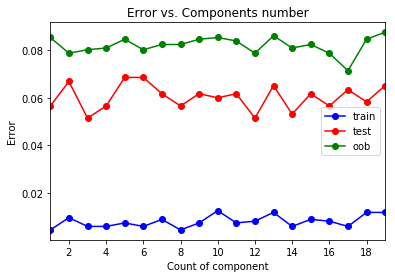

In [263]:
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.plot(components_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(components_arr), np.max(components_arr)])
plt.title('Error vs. Components number')
plt.xlabel('Count of component')
plt.ylabel('Error')
plt.legend()
pass

Можно заметить, что наблюдается ситуация переобучения.

Минимальные значения ошибок на обучающей и тестовой выборке равны:

In [264]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Minimal learning set error:", min_train_err)
print("Minimal test set error: ", min_test_err)

('Minimal learning set error:', 0.004418262150220913)
('Minimal test set error: ', 0.051457975986277875)


Оптимальное количество компонент равно:

In [265]:
opt_components_num = components_arr[test_err == min_test_err]
print(opt_components_num)

[ 3 12]
